# 군집 실습

다음의 데이터는 1973년 미국에서 수집된 통계로 인구 100,000명당 범죄로 체포된 사람과 관련된 자료이다.

A data frame with 50 observations on 4 variables.

* **Murder** numeric Murder arrests (per 100,000)
* **Assault** numeric Assault arrests (per 100,000)
* **UrbanPop** numeric Percent urban population
* **Rape** numeric Rape arrests (per 100,000)

### 문제1 
해당 데이터셋을 읽어들이고 확인하시오.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
arrests = pd.read_csv('../../data/USArrests.csv')

arrests.info()
arrests.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
X = np.array(arrests[['Murder','Assault','UrbanPop','Rape']])

### 문제 2 
데이터 스케일 표준화하시오.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### 문제 3 
k-means로 데이터를 군집하시오. 적당한 K의 값을 정하시오.

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)

y_km = km.fit_predict(X_std)
y_km

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

### 문제 4
클러스터의 center값 확인하시오.

In [6]:
km.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

### 문제 5
클러스터 결과를 산점도 등으로 시각화 해보시오.

Text(0, 0.5, 'Assault')

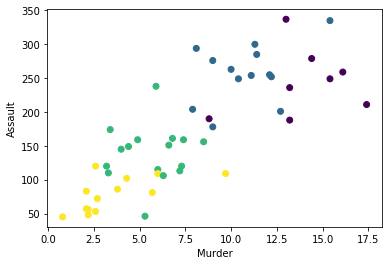

In [7]:
plt.scatter(X[:, 0],X[:,1], c=y_km)
plt.xlabel("Murder")
plt.ylabel("Assault")

In [8]:
r = pd.concat([arrests, pd.Series(y_km, name='Cluster')], axis=1)
r.head()

,Name,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


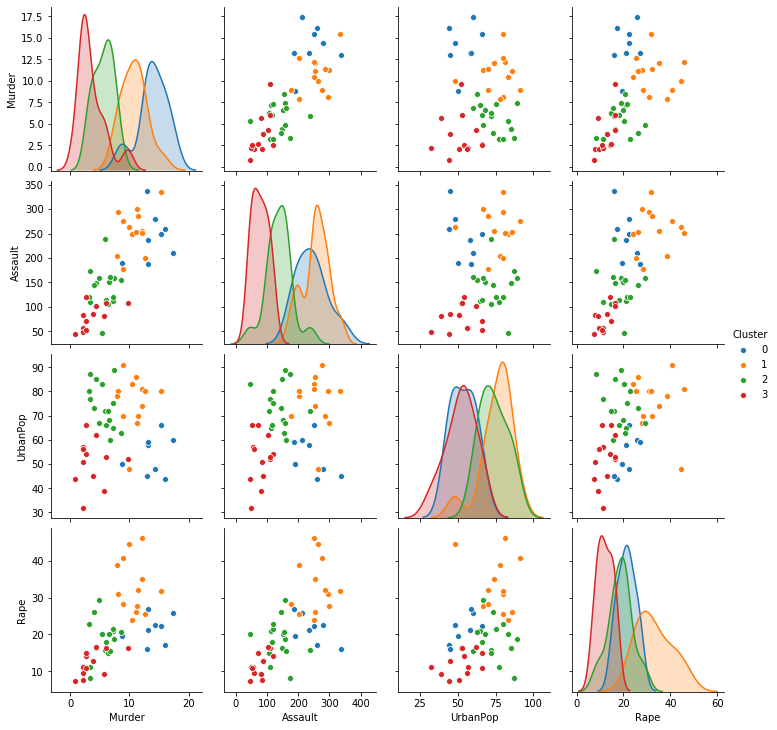

In [9]:
sns.pairplot(r, vars=['Murder','Assault','UrbanPop','Rape'], hue='Cluster')

### 문제 6
실루엣 계수를 사용하여 군집 모형을 평가해 보시오.

In [10]:
# 모델을 평가합니다.

from sklearn.metrics import silhouette_score

silhouette_score(X_std, y_km)

0.33968891433344395